<a href="https://colab.research.google.com/github/MinjuKim0217/Data_Analysis/blob/main/%EC%86%8C%EB%B0%A9_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#경고 무시 명령
import warnings
warnings.filterwarnings('ignore')

In [3]:
#numpy/pandas 지수 표기 옵션
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


# 데이터 로드


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/02.격자단위_구급출동_dataset.csv")
df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88000,0.72000,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36000,1.44000,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93000,0.15000,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69000,0.16000,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35000,0.14000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48000,1.04000,0,0,0,0,0,0,0,0
1769074,40545364,405475,536475,23,20201230,4213000000,1.21000,0.32000,0,0,0,0,0,0,0,0
1769075,40645144,406475,514475,23,20201230,4213000000,1.28000,0.30000,0,0,0,0,0,0,0,0
1769076,40745144,407475,514475,23,20201230,4213000000,6.17000,1.47000,0,0,0,0,0,0,0,0


In [5]:
# 데이터프레임 info 함수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769078 entries, 0 to 1769077
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GRID_ID                int64  
 1   GRID_X_AXIS            int64  
 2   GRID_Y_AXIS            int64  
 3   TIME                   int64  
 4   YMD                    int64  
 5   STDG_CD                int64  
 6   FP_IDEX                float64
 7   OLD_FP_IDEX            float64
 8   RELIFPLC_DWL_IDEX      int64  
 9   RELIFPLC_ROAD_IDEX     int64  
 10  RELIFPLC_INDUST_IDEX   int64  
 11  RELIFPLC_NTR_IDEX      int64  
 12  RELIFPLC_ETC_IDEX      int64  
 13  DSP_CNT_IDEX           int64  
 14  DISEASE_DSP_IDEX       int64  
 15  DISEASE_EXCL_DSP_IDEX  int64  
dtypes: float64(2), int64(14)
memory usage: 216.0 MB


In [6]:
df["YMD"]

0          20200101
1          20200101
2          20200101
3          20200101
4          20200101
             ...   
1769073    20201230
1769074    20201230
1769075    20201230
1769076    20201230
1769077    20201230
Name: YMD, Length: 1769078, dtype: int64

### MONTH / DAY / WEEKDAY 컬럼 추가 

In [19]:
import datetime

# 요일 0 ~ 6 정수값 return (월요일 ~ 일요일)
def get_weekday(ymd):
    yyyy = int(ymd/10000)
    mm = int(ymd%10000/100)    
    dd = int(ymd%10000%100)  
    return datetime.date(yyyy,mm,dd).weekday()

## apply 함수
df["MONTH"] = df["YMD"].apply(lambda x : int(x%10000/100) )
df["DAY"] = df["YMD"].apply(lambda x : int(x%10000%100) )
df["WEEKDAY"] = df["YMD"].apply(get_weekday)

df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,MONTH,DAY,WEEKDAY
0,38045314,380475,531475,0,20200101,4213000000,2.88000,0.72000,0,0,0,0,0,0,0,0,1,1,2
1,38045324,380475,532475,0,20200101,4213000000,9.36000,1.44000,0,0,0,0,0,0,0,0,1,1,2
2,38145354,381475,535475,0,20200101,4213000000,3.93000,0.15000,0,0,0,0,0,0,0,0,1,1,2
3,38245184,382475,518475,0,20200101,4213000000,2.69000,0.16000,0,0,0,0,0,0,0,0,1,1,2
4,38245194,382475,519475,0,20200101,4213000000,2.35000,0.14000,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48000,1.04000,0,0,0,0,0,0,0,0,12,30,2
1769074,40545364,405475,536475,23,20201230,4213000000,1.21000,0.32000,0,0,0,0,0,0,0,0,12,30,2
1769075,40645144,406475,514475,23,20201230,4213000000,1.28000,0.30000,0,0,0,0,0,0,0,0,12,30,2
1769076,40745144,407475,514475,23,20201230,4213000000,6.17000,1.47000,0,0,0,0,0,0,0,0,12,30,2


# 출동 빈도 지수 EDA

In [8]:
# 출동빈도 지수
df["DSP_CNT_IDEX"].describe()

count   1769078.00000
mean          0.00931
std           0.10728
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          14.00000
Name: DSP_CNT_IDEX, dtype: float64

In [10]:
# 질병출동 지수
df["DISEASE_DSP_IDEX"].describe()

count   1769078.00000
mean          0.00408
std           0.06489
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: DISEASE_DSP_IDEX, dtype: float64

In [11]:
# 질병외 출동 지수
df["DISEASE_EXCL_DSP_IDEX"].describe()

count   1769078.00000
mean          0.00523
std           0.08126
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          11.00000
Name: DISEASE_EXCL_DSP_IDEX, dtype: float64

## 1) 격자별 출동 빈도 지수 비교

In [12]:
import numpy as np

# 격자 ID 기준으로 DSP_CNT_IDEX 값을 SUM 기준으로 데이터 변환
rect_table = pd.pivot_table(df, values= "DSP_CNT_IDEX" , index=['GRID_ID'], aggfunc=np.sum)

rect_table["GRID_ID"] = rect_table.index.values
rect_table

,DSP_CNT_IDEX,GRID_ID
GRID_ID,,
37645864,1,37645864
37745114,23,37745114
37745124,8,37745124
37745144,4,37745144
37745154,13,37745154
...,...,...
44145094,1,44145094
44945564,1,44945564
45045614,1,45045614


In [13]:
## 격자별 출동빈도 지수 테이블
rect_table["DSP_CNT_IDEX"].describe()

count    687.00000
mean      23.97962
std       88.92559
min        0.00000
25%        1.00000
50%        4.00000
75%       11.00000
max     1085.00000
Name: DSP_CNT_IDEX, dtype: float64

In [14]:
# 1년간 500번 이상 출동된 격자 ID
rect_table["DSP_CNT_IDEX"][rect_table["DSP_CNT_IDEX"] > 500]

GRID_ID
39445274     708
39545254    1085
39545274     961
39645244     511
39645264     608
Name: DSP_CNT_IDEX, dtype: int64

In [15]:
# 1년간 출동횟수가 0 인 격자 ID
rect_table["DSP_CNT_IDEX"][rect_table["DSP_CNT_IDEX"] == 0]

GRID_ID
37845174    0
37845184    0
37845214    0
37845264    0
37845274    0
           ..
40845334    0
40845344    0
41445124    0
41545154    0
41745204    0
Name: DSP_CNT_IDEX, Length: 92, dtype: int64

## 2) 시간대별 출동 빈도 지수 비교

In [16]:
import numpy as np

# pivot_table 함수
time_idex = pd.pivot_table(df, values= ["DSP_CNT_IDEX"] , index=['TIME'], aggfunc=np.mean)
time_idex["HOUR"] = time_idex.index.values
time_idex

,DSP_CNT_IDEX,HOUR
TIME,,
0,0.01304,0
1,0.01118,1
2,0.00851,2
3,0.00807,3
4,0.00769,4
5,0.00776,5
6,0.00867,6
7,0.00914,7
8,0.01097,8


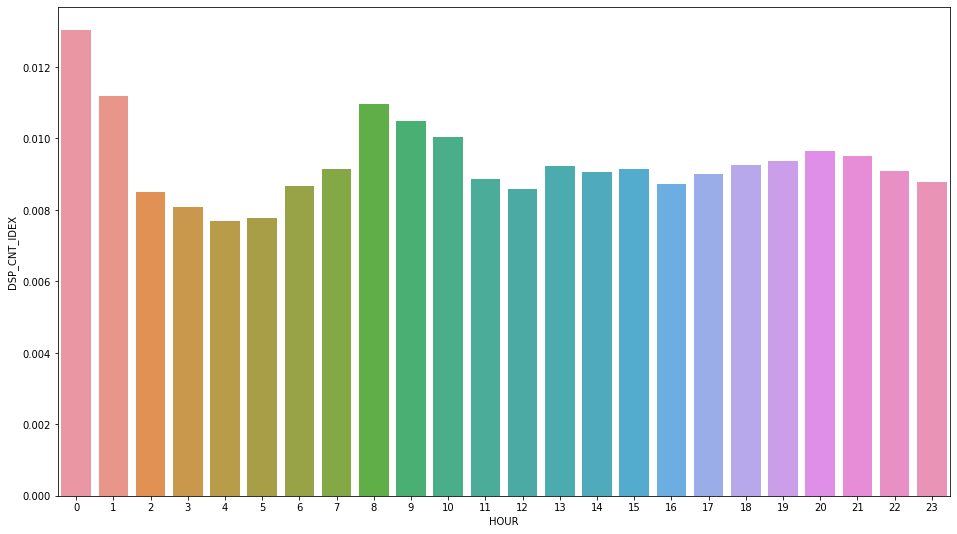

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn barplot
plt.figure(figsize = (16,9))
sns.barplot(x="HOUR", y="DSP_CNT_IDEX", data=time_idex)

## 3) 요일별 출동 빈도 시각화

In [20]:
weekday_idx = pd.pivot_table(df, values= "DSP_CNT_IDEX" , index=['WEEKDAY'], aggfunc=np.mean)
weekday_idx["WEEKDAY"] = weekday_idx.index.values
weekday_idx

,DSP_CNT_IDEX,WEEKDAY
WEEKDAY,,
0,0.01007,0
1,0.00953,1
2,0.00946,2
3,0.00912,3
4,0.00929,4
5,0.00880,5
6,0.00900,6


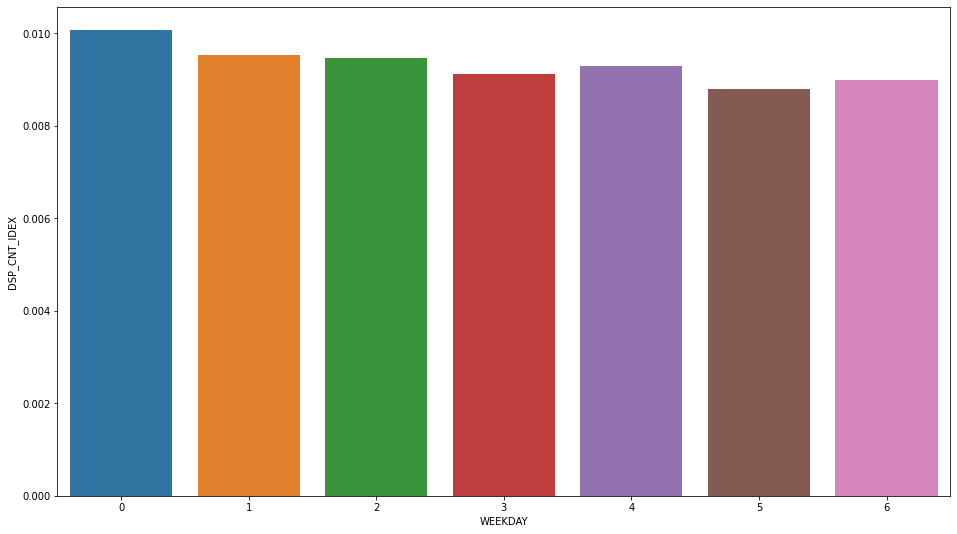

In [22]:
plt.figure(figsize = (16,9))
sns.barplot(x="WEEKDAY", y="DSP_CNT_IDEX", data=weekday_idx)

## 4) 월별 출동 빈도 지수 시각화

In [23]:
month_idx = pd.pivot_table(df, values= ["DSP_CNT_IDEX"] , index=['MONTH'], aggfunc=np.mean)
month_idx["MONTH"] = month_idx.index.values
month_idx

,DSP_CNT_IDEX,MONTH
MONTH,,
1,0.00935,1
2,0.00969,2
3,0.00851,3
4,0.00884,4
5,0.00942,5
6,0.00975,6
7,0.00975,7
8,0.01051,8
9,0.00936,9


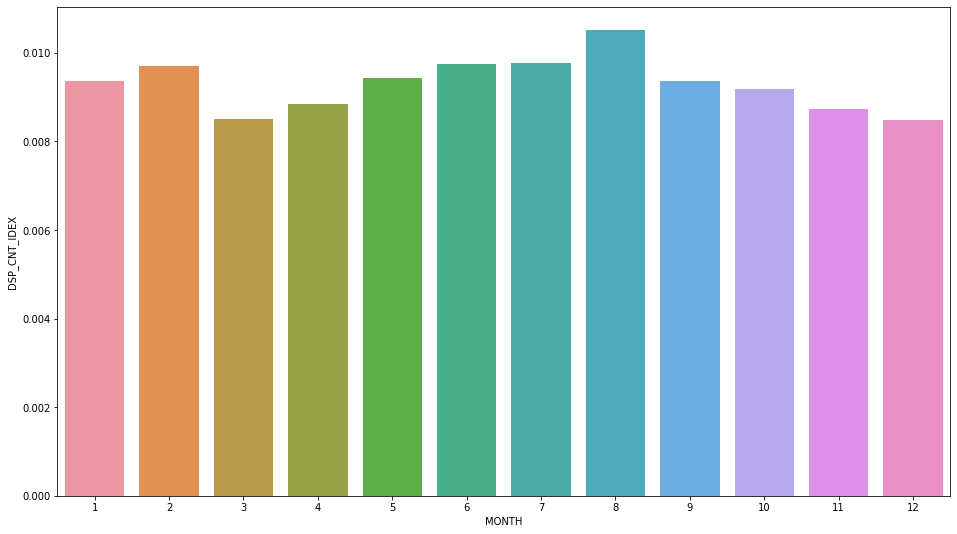

In [24]:
plt.figure(figsize = (16,9))
sns.barplot(x="MONTH", y="DSP_CNT_IDEX", data=month_idx)